In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
BATCH_SIZE = 32
CHANNELS = 3
IMAGE_SIZE = 256
EPOCHS = 5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\Deep Learning\paper rock datasets",
    shuffle= True,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE,IMAGE_SIZE)
)

Found 2188 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['paper', 'rock', 'scissors']

In [5]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
len(dataset)

69

(256, 256, 3)


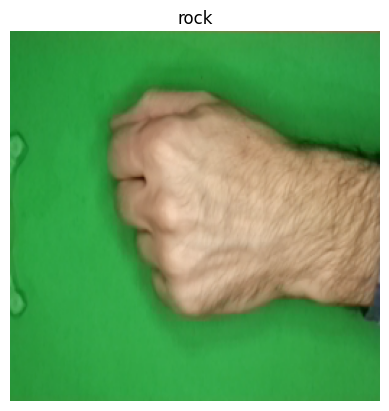

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[1]])
    plt.axis("off")
    print(image_batch[0].shape)
    


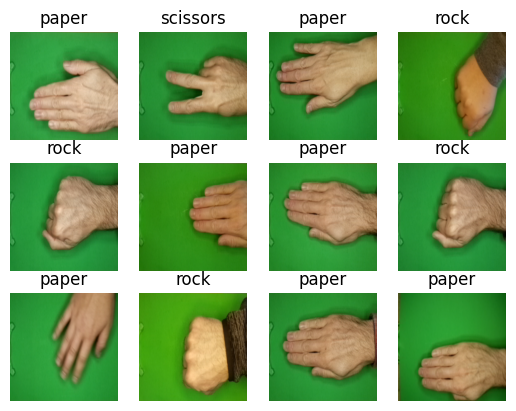

In [8]:
for image_batch , label_batch  in dataset.take(1):
   for i in range(12):
    ax =plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
    
    


In [9]:
len(dataset)


69

In [10]:
train = 0.8
len(dataset)*train


55.2

In [11]:
train_ds = dataset.take(55)
len(train_ds)

55

In [12]:
test = 0.1
test_ds = dataset.skip(55)
len(test_ds)

14

In [13]:
val = 0.1
len(dataset)*val

6.9

In [14]:
val_ds = dataset.take(7)
len(val_ds)

7

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
resize_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(0.1/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1)
])

In [18]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([

    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation= 'softmax'),
])
model.build(input_shape = input_shape)


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (32, 516128)              0         
                                                                 
 dense (Dense)               (32, 64)                  33032256  
                                                      

In [20]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [21]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/5
55/55 [==============================] - 100s 2s/step - loss: 135.5331 - accuracy: 0.4472 - val_loss: 1.3948 - val_accuracy: 0.7500
Epoch 2/5
55/55 [==============================] - 77s 1s/step - loss: 1.4360 - accuracy: 0.6852 - val_loss: 0.7301 - val_accuracy: 0.7589
Epoch 3/5
55/55 [==============================] - 80s 1s/step - loss: 0.6232 - accuracy: 0.7903 - val_loss: 0.4780 - val_accuracy: 0.8482
Epoch 4/5
55/55 [==============================] - 82s 1s/step - loss: 0.5579 - accuracy: 0.8165 - val_loss: 0.5912 - val_accuracy: 0.7946
Epoch 5/5
55/55 [==============================] - 74s 1s/step - loss: 0.4343 - accuracy: 0.8585 - val_loss: 0.3225 - val_accuracy: 0.8973


In [22]:
model.evaluate(test_ds)

14/14 [==============================] - 9s 320ms/step - loss: 0.4250 - accuracy: 0.8528


[0.42501193284988403, 0.8528037667274475]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


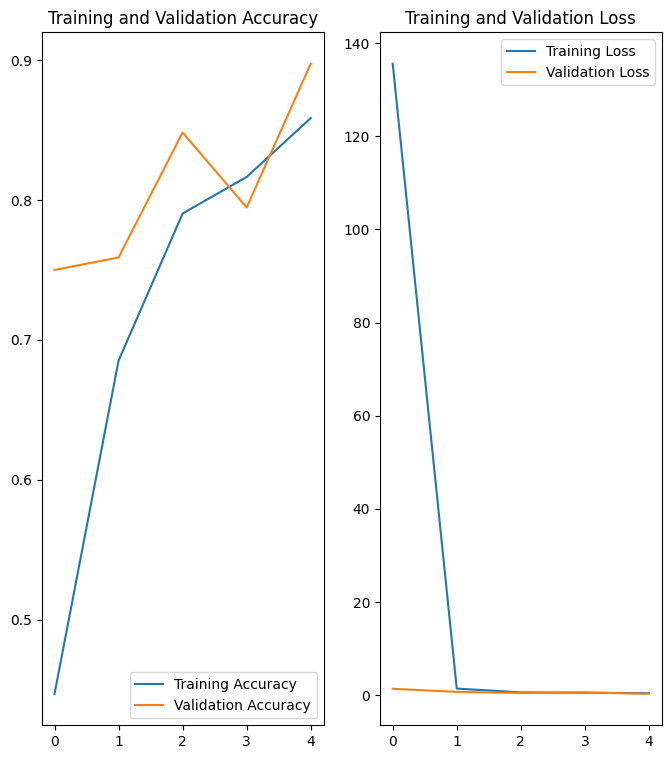

In [24]:
plt.figure(figsize=(8, 9))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to pridect
first image actual label: rock
1/1 [==============================] - 1s 616ms/step
predicted_lable: rock


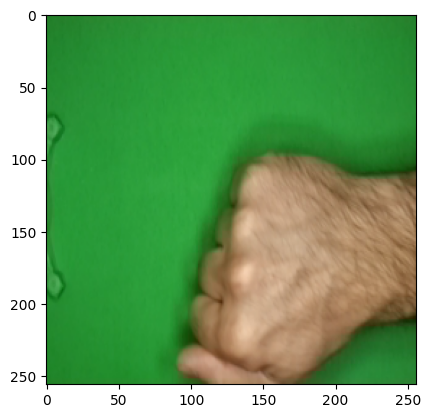

In [26]:
import numpy as np
for image_batch, label_batch in train_ds.take(1):
   first_image = (image_batch[1].numpy().astype('uint8'))
first_label = label_batch[1].numpy()

print("first image to pridect")
plt.imshow(first_image)
print("first image actual label:",class_names[first_label])

batch_pridection = model.predict(image_batch)    
print("predicted_lable:",class_names[np.argmax(batch_pridection[1])])

1/1 [==============================] - 0s 65ms/step


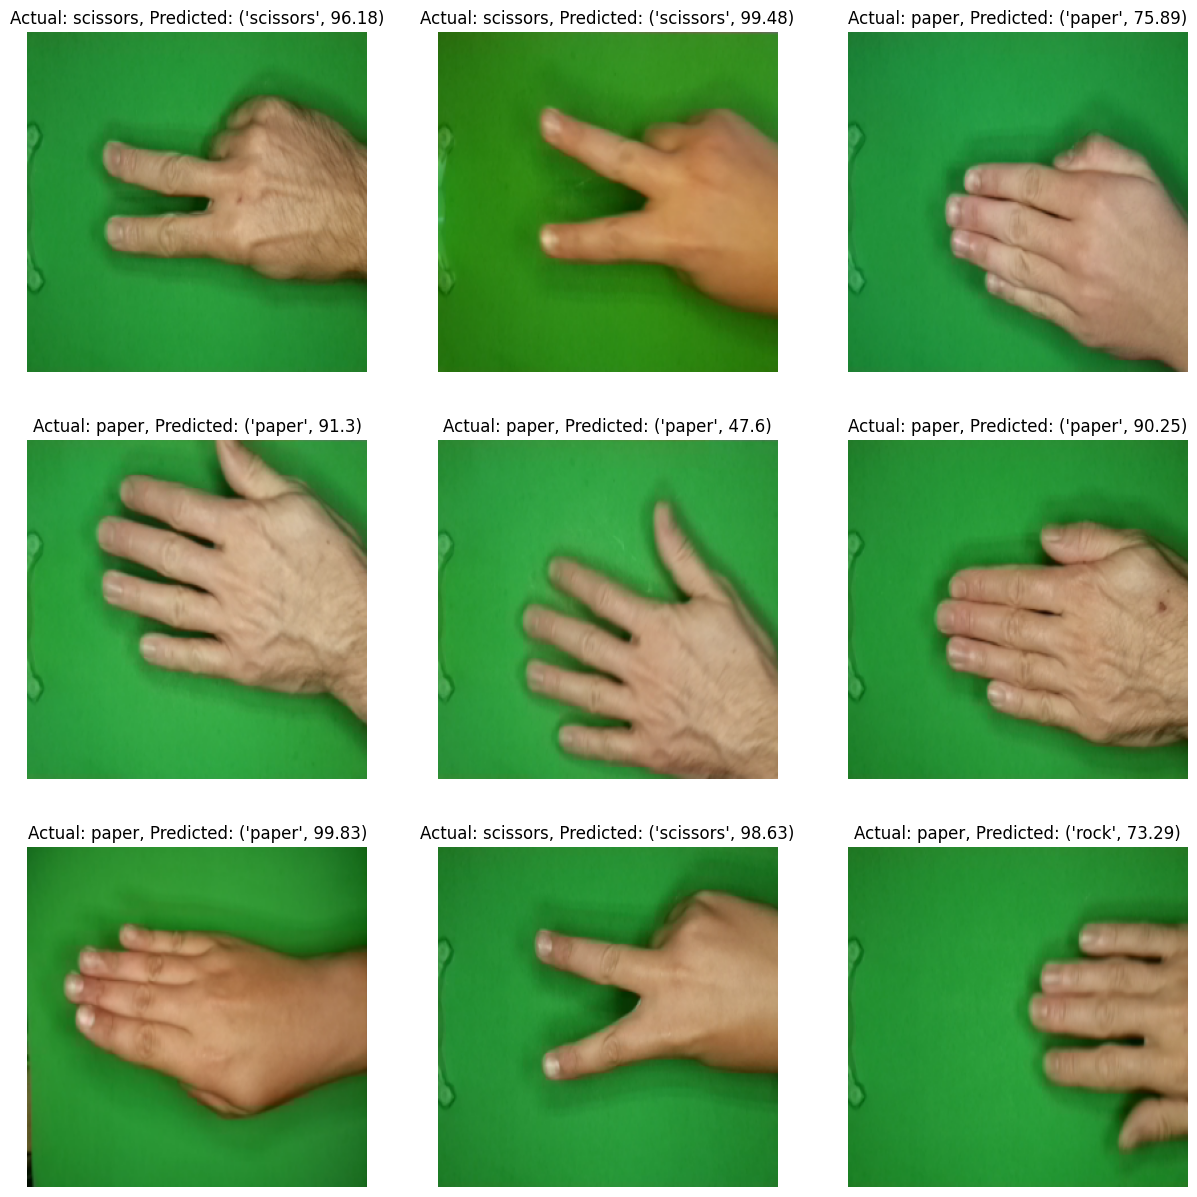

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        
        #confidence = round(100 * (np.max(predictions[0])), 2)
        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
       # plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}",\n Confidence:{confidence}%")
        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")

        
        plt.axis("off")